In [1]:
#importing required libraries for assignment
import requests
import pandas as pd
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [58]:
def get_name_heights(url):
  soup = BeautifulSoup(requests.get(url).content, 'html.parser')

  #scraping heights, names
  raw_heights = soup.find_all('td', class_ = 'height')
  raw_names = soup.find_all('div', {'class':'sidearm-roster-player-name'})

  #creating empty list heights,names
  heights = []
  names = []

  #iterating through raw names, looking for non-empty divs that contain players in roster
  for raw_name in raw_names:
    if len(raw_name) >= 2:
      names.append(raw_name.find('a').text)

  for raw_height in raw_heights:
    i = raw_height.get_text()

    #avoiding error with -'s, by adding them into the list, heights.
    if i == '-':
      heights.append(i)
      continue

    #converting the strings to floats of inches for heights that aren't '-'
    feet = float(i.split('-')[0]) * 12
    inches = float(i.split('-')[1])
    total = feet + inches 
    heights.append(total)

  avger(heights)

  #converting to a dataframe
  df = pd.DataFrame()
  df['names'] = names
  df['heights'] = heights
  return df

In [59]:
def avger(heights):
  #reusing total variable so code
  total = 0

  #finding average, if the variable in list of lengths isn't '-', we add to the total variable
  for j in range(0, len(heights)):
    if heights[j] != '-':
      total += heights[j]

  #average
  avg = total/len(heights) 

  #replacing the value of '-' with the average of the list in heights
  for k in range(0, len(heights)):
    if heights[k] == '-':
      heights[k] = round(avg,1)
  return heights


1. Scrape data and compile a dataframe of all the names and heights of the players on the
men’s swimming teams. Output this data as a csv file.


In [21]:
mens_swimming = [
  'https://csidolphins.com/sports/mens-swimming-and-diving/roster',
  'https://yorkathletics.com/sports/mens-swimming-and-diving/roster',
  'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
  'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
  'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster',
  'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
  'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
  'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
  'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
  'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'
]

In [61]:
#create empty dataframe, swimming
m_swimming = pd.DataFrame()

#concat all urls of men's swimming teams into a single dataframe, swimming
for i in range(len(mens_swimming)):
  df = get_name_heights(mens_swimming[i])
  m_swimming = pd.concat([m_swimming,df])

m_swimming

,names,heights
0,Daniel Angulo,63.9
1,Anthony Attenborough,70.0
2,Charles Cusumano,64.0
3,Eslam Hussein,70.0
4,Chris Ivanov,75.0
...,...,...
5,Kieran Hassard,72.0
6,Anthony Laite,69.0
7,Drew MacDonald,72.0
8,Kyle Morken,73.0


In [56]:
# converting dataframe to csv file, mens_swimming

m_swimming.to_csv(r'mens_swimming.csv',index=False)

,names,heights
0,Daniel Angulo,-
1,Anthony Attenborough,70.0
2,Charles Cusumano,64.0
3,Eslam Hussein,70.0
4,Chris Ivanov,75.0
...,...,...
5,Kieran Hassard,72.0
6,Anthony Laite,69.0
7,Drew MacDonald,72.0
8,Kyle Morken,73.0


2. Scrape data and compile a dataframe of all the names and heights of the players on the
women’s swimming teams. Output this data as a csv file.


In [64]:
womens_swimming = [
'https://csidolphins.com/sports/womens-swimming-and-diving/roster',
'https://queensknights.com/sports/womens-swimming-and-diving/roster',
'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'
]

In [65]:
#create empty dataframe, w_swimming
w_swimming = pd.DataFrame()

#concat all urls of women's swimming teams into a single dataframe, w_swimming
for i in range(len(womens_swimming)):
  df = get_name_heights(womens_swimming[i])
  w_swimming = pd.concat([w_swimming,df])
  
w_swimming

,names,heights
0,Kathleen Bridgman,65.0
1,Angye Galan,43.8
2,Jessica Johnson,68.0
3,Macy Jones-Busch,43.8
4,Bridget Mulvey,67.0
...,...,...
14,Paige Splendido,65.0
15,Emma Stephenson,67.0
16,Callie Stinson,64.0
17,Jessie Triller,62.0


In [ ]:
# converting dataframe to csv file, womens_swimming

w_swimming.to_csv(r'womens_swimming.csv',index=False)

3. Scrape data and compile a dataframe of all the names and heights of the players on the
men’s volleyball teams. Output this data as a csv file.


In [67]:
mens_volleyball = [
'https://ccnyathletics.com/sports/mens-volleyball/roster',
'https://lehmanathletics.com/sports/mens-volleyball/roster',
'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
'https://johnjayathletics.com/sports/mens-volleyball/roster',
'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
'https://mecathletics.com/sports/mens-volleyball/roster',
'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
'https://yorkathletics.com/sports/mens-volleyball/roster',
'https://ballstatesports.com/sports/mens-volleyball/roster'
]

In [68]:
#create empty dataframe
m_volleyball = pd.DataFrame()

#concat all urls of mens_volleyball teams into a single dataframe
for i in range(len(mens_volleyball)):
  df = get_name_heights(mens_volleyball[i])
  m_volleyball = pd.concat([m_volleyball,df])

m_volleyball

,names,heights
0,Jeffrey Celis,69.0
1,Reng Chen,69.0
2,Edwin Fierros Gaytan,68.0
3,Fred De La Cuadra,70.0
4,Utpal Chand,69.0
...,...,...
16,Brandon Shepherd,74.0
17,Kevin Doran,79.0
18,Sammy Adkisson,69.0
19,Lucas Biondi,78.0


In [ ]:
# converting dataframe to csv file, mens_volleyball

m_volleyball.to_csv(r'mens_volleyball.csv',index=False)

4. Scrape data and compile a dataframe of all the names and heights of the players on the
women’s volleyball teams. Output this data as a csv file

In [70]:
womens_volleyball = [
'https://bmccathletics.com/sports/womens-volleyball/roster',
'https://yorkathletics.com/sports/womens-volleyball/roster',
'https://hostosathletics.com/sports/womens-volleyball/roster',
'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
'https://queensknights.com/sports/womens-volleyball/roster',
'https://augustajags.com/sports/wvball/roster',
'https://flaglerathletics.com/sports/womens-volleyball/roster',
'https://pacersports.com/sports/womens-volleyball/roster',
'https://www.golhu.com/sports/womens-volleyball/roster'
]

In [71]:
#create empty dataframe
w_volleyball = pd.DataFrame()

#concat all urls of womens_volleyball teams into a single dataframe
for i in range(len(womens_volleyball)):
  df = get_name_heights(womens_volleyball[i])
  w_volleyball = pd.concat([w_volleyball,df])

w_volleyball

,names,heights
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
13,Hannah Lingold,70.0
14,Meghan Tennant,75.0
15,Samantha Arens-Ennis,65.0
16,Krystal Heffelfinger,71.0


In [73]:
# converting dataframe to csv file, womens_volleyball
w_volleyball.to_csv(r'womens_volleyball.csv',index=False)

5. Find the average height in each of the 4 dataframes (so you should have 4 averages in
total). Print these values in your program and include them in your report.


In [75]:
m_swim_avg = round(m_swimming['heights'].mean(),2)
w_swim_avg = round(w_swimming['heights'].mean(),2)
m_vb_avg = round(m_volleyball['heights'].mean(),2)
w_vb_avg = round(w_volleyball['heights'].mean(),2)

avg_hts = pd.DataFrame(
  {
    'team': ['mens_swimming','womens_swimming','mens_volleyball','womens_volleyball'],
    'avg' : [m_swim_avg,w_swim_avg,m_vb_avg,w_vb_avg]
  }
)
avg_hts

,team,avg
0,mens_swimming,71.47
1,womens_swimming,65.07
2,mens_volleyball,72.05
3,womens_volleyball,67.16


6. Find the names and the heights of the 5 tallest and the 5 shortest swimmers and
volleyball players for both the men’s and women’s teams. That is you must have 8 lists in
total: tallest men swimmers, tallest men volleyball players, tallest women swimmers,
tallest women volleyball players, shortest men swimmers, shortest men volleyball
players, shortest women volleyball players, shortest women swimmers. Print these
names and heights ONLY in your program. Do not include them in your report.


In [ ]:
#tallest men swimmer
m_swim_tall = m_swimming.sort_values(by='heights',ascending=False)
m_swim_tall.head(5)

,names,heights
15,Josh Templeton,78.0
9,Colton Grimes,78.0
4,Jerry Brown,77.0
13,Eric Kroon,77.0
16,Zach Linder,77.0


In [ ]:
#shortest men swimmer
m_swim_short = m_swimming.sort_values(by='heights')
m_swim_short.head(5)

,names,heights
1,David Greenwald,57.2
0,Daniel Angulo,63.9
3,Eric Li,64.0
2,Charles Cusumano,64.0
5,Samuel De Leon,65.0


In [ ]:
#tallest women swimmer
w_swim_tall = w_swimming.sort_values(by='heights',ascending=False)
w_swim_tall.head(5)

,names,heights
6,Kamilla Shulanova,72.0
15,Haley Rey,71.0
11,Presley Heitzmann,71.0
7,Isabella Gable,71.0
3,Claire Brouillet,71.0


In [ ]:
#shortest women swimmer (top 3 are the -, averaged out, so I skipped them)
w_swim_short = w_swimming.sort_values(by='heights')
# w_swim_short.head(8)
w_swim_short[3:8]

,names,heights
0,Rupakshi Aggarwal,53.0
3,Claudia Cimino,53.0
11,Melanie Rodriguez,59.0
5,Micaela Reyes,59.0
23,Lillie Schafer,60.0


In [ ]:
#tallest men volleyball
m_vb_tall = m_volleyball.sort_values(by='heights',ascending=False)
m_vb_tall.head(5)

,names,heights
11,Mark Wickstrom,81.0
13,Will Hippe,80.0
20,Nick Martinski,79.0
17,Kevin Doran,79.0
9,Angelos Mandilaris,79.0


In [ ]:
#shortest men volleyball
m_vb_short = m_volleyball.sort_values(by='heights')
m_vb_short.head(5)

,names,heights
1,Juan Lemus,63.0
2,Bryce Glasper,64.0
0,Darren Roach,66.0
2,Andrew Reza,66.0
0,Bryan Eng,66.0


In [ ]:
#tallest women volleyball
w_vb_tall = w_volleyball.sort_values(by='heights',ascending=False)
w_vb_tall.head(5)

,names,heights
9,Molly Boyd,75.0
14,Meghan Tennant,75.0
11,Alyssa Daley,75.0
7,McKenzie Eaves,74.0
5,Logan Garcia,74.0


In [ ]:
#shortest women volleyball
w_vb_short = w_volleyball.sort_values(by='heights')
w_vb_short.head(5)

,names,heights
0,Jaylina Kraker,59.0
12,Kenndy Vasquez,59.0
0,Yeralkis Gomez,59.0
3,Ariana Serrano,60.0
3,Kiara Gonzalez,60.0


7. Are you able to determine whether, in general, if the average swimmer is taller than the
average volleyball player? Compare your findings in this project to those in homework
#1. Generate a 2 page report describing this. Your report should be single spaced and
written in a 12 pt font. The first page will cover the following:
- Introduction - briefly state the goal of the project
-Techniques Used
-Methodology
-Presenting the findings
-Discussion - State whether you think the findings are representative of both sports
-Conclusion


8. Generate a bar graph showing the average height distribution across the 4 different team
categories. (mens’ swimming, men’s volleyball, women’s swimming, women’s volleyball).
This graph should be on the second page of your report in an appendix section. Do not
include this graph in your 1 page essay. You may reference it as a figure in your
appendix.

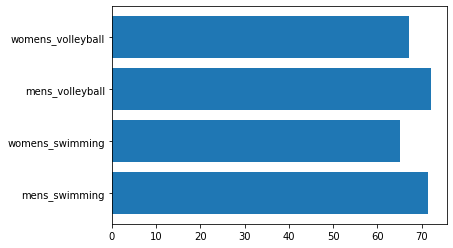

In [76]:
plt.barh(avg_hts['team'],avg_hts['avg'])
plt.show()